<a href="https://colab.research.google.com/github/mamatgeol/Kelompok-3-PMML/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import re
import pandas as pd

file_path = "tweets_DigitalisasiPembelajaran.txt"

tweets = []

with open(file_path, "r", encoding="utf-8") as f:
    for line in f:
        if line.startswith("Text:"):
            text = line.replace("Text:", "").strip()
            tweets.append(text)

df = pd.DataFrame({"tweet": tweets})
df.head()


,tweet
0,10 org pertama yang daftar dan main di #bagus3...
1,semangat belajar siswa makin tumbuh karena fas...
2,@Henik_yuli program #DigitalisasiPembelajaran ...
3,ikut nyimak rangkaian programnya dan kerasa ba...
4,"@textcicicuit dulu zaman kita sekolah, paling ..."


In [3]:
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\d+", "", text)
    return text.strip()

df["clean_text"] = df["tweet"].apply(clean_text)
df.head()


,tweet,clean_text
0,10 org pertama yang daftar dan main di #bagus3...,org pertama yang daftar dan main di free join...
1,semangat belajar siswa makin tumbuh karena fas...,semangat belajar siswa makin tumbuh karena fas...
2,@Henik_yuli program #DigitalisasiPembelajaran ...,program cocok banget untuk generasi indonesia...
3,ikut nyimak rangkaian programnya dan kerasa ba...,ikut nyimak rangkaian programnya dan kerasa ba...
4,"@textcicicuit dulu zaman kita sekolah, paling ...",dulu zaman kita sekolah paling canggih overhea...


In [6]:
lexicon_path = "Lxicon.csv"   # ganti sesuai lokasi kamu
lex = pd.read_csv(lexicon_path)

lexicon = dict(zip(lex["word"], lex["weight"]))

def lexicon_score(text):
    score = 0
    for word in text.split():
        score += lexicon.get(word, 0)
    return score

df["sentiment_score"] = df["clean_text"].apply(lexicon_score)

def label_sentiment(score):
    if score > 0:
        return "positif"
    elif score < 0:
        return "negatif"
    else:
        return "netral"

df["label"] = df["sentiment_score"].apply(label_sentiment)
df


,tweet,clean_text,sentiment_score,label
0,10 org pertama yang daftar dan main di #bagus3...,org pertama yang daftar dan main di free join...,0,netral
1,semangat belajar siswa makin tumbuh karena fas...,semangat belajar siswa makin tumbuh karena fas...,2,positif
2,@Henik_yuli program #DigitalisasiPembelajaran ...,program cocok banget untuk generasi indonesia...,1,positif
3,ikut nyimak rangkaian programnya dan kerasa ba...,ikut nyimak rangkaian programnya dan kerasa ba...,0,netral
4,"@textcicicuit dulu zaman kita sekolah, paling ...",dulu zaman kita sekolah paling canggih overhea...,1,positif
...,...,...,...,...
95,bagus nih acara programnya bikin optimis anak-...,bagus nih acara programnya bikin optimis anaka...,2,positif
96,Baca program-programnya bikin optimis. Anak-an...,baca programprogramnya bikin optimis anakanak ...,1,positif
97,sumpah keren banget liat sekolah-sekolah mulai...,sumpah keren banget liat sekolahsekolah mulai ...,1,positif
98,"serius sih, dari banyak program yang jalan ker...",serius sih dari banyak program yang jalan kera...,0,netral


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["clean_text"])
y = df["label"]

In [7]:
# Split Data 80/20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
# TRAIN MODEL NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

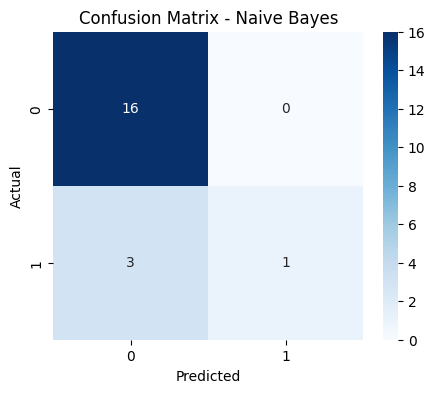

              precision    recall  f1-score   support

      netral       0.84      1.00      0.91        16
     positif       1.00      0.25      0.40         4

    accuracy                           0.85        20
   macro avg       0.92      0.62      0.66        20
weighted avg       0.87      0.85      0.81        20



In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = nb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred))


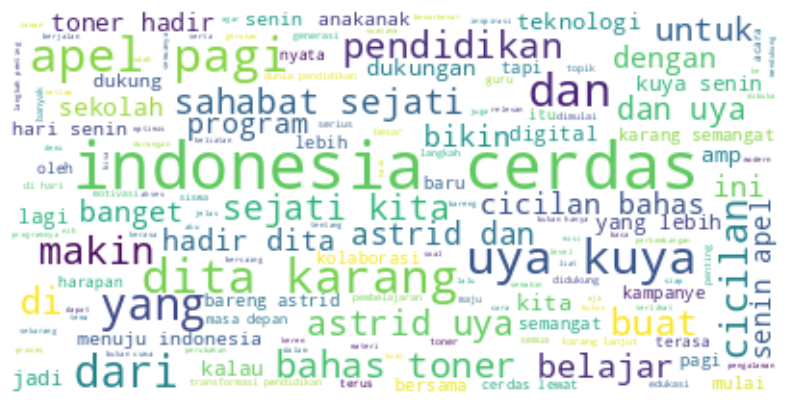

In [11]:
from wordcloud import WordCloud

# Wordcloud
all_words = " ".join(df["clean_text"])
wc = WordCloud(background_color="white").generate(all_words)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


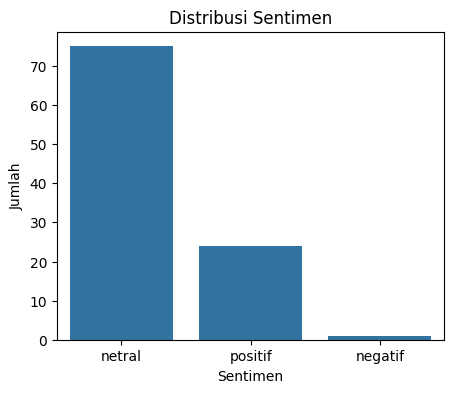

label
netral     75
positif    24
negatif     1
Name: count, dtype: int64


In [12]:
# Jumlah sentimen
sent_count = df["label"].value_counts()

plt.figure(figsize=(5,4))
sns.barplot(x=sent_count.index, y=sent_count.values)
plt.title("Distribusi Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.show()

print(sent_count)

In [13]:
print("=== OUTPUT AKHIR ===")
print("Total Data :", len(df))
print("Positif:", sent_count.get("positif", 0))
print("Negatif:", sent_count.get("negatif", 0))
print("Netral :", sent_count.get("netral", 0))

=== OUTPUT AKHIR ===
Total Data : 100
Positif: 24
Negatif: 1
Netral : 75
